In [2]:
import deepxde as dde
from deepxde.backend import tf
import numpy as np
from time import time
import matplotlib.pyplot as plt
from matplotlib import cm
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
dde.config.set_default_float("float64")

Num GPUs Available:  1
Set the default float type to float64


In [3]:
t0 = time()
geom= dde.geometry.Interval(0,2*np.pi)
timedomain = dde.geometry.TimeDomain(0,10)
geotime = dde.geometry.GeometryXTime(geom,timedomain)

def pde(x,y):
    dy_x = dde.grad.jacobian(y,x,i=0,j=0)
    dy_t = dde.grad.jacobian(y,x,i=0,j=1)
    dy_xx = dde.grad.hessian(y,x,i=0,j=0)
    return dy_t + y*dy_x - 0.1*dy_xx - tf.sin(x[:,0:1])

bc = dde.icbc.DirichletBC(geotime,lambda x: 0, lambda _,on_boundary:on_boundary)
ic = dde.icbc.IC(geotime,lambda x:np.sin(x[:,0:1]),lambda _,on_initial:on_initial)

data = dde.data.TimePDE(geotime,pde,[bc,ic],num_domain=10000,num_boundary=500,num_initial=500)

net = dde.nn.FNN([2]+[50]*4+[1],'tanh','Glorot normal')

model5 = dde.Model(data,net)
model5.compile("adam", lr=1e-3)
print("learning rate = ",1e-3)
model5.train(iterations=15000)
model5.compile("L-BFGS")
losshistory, train_state = model5.train()
t1 = time()
print("Total time taken:",t1-t0,"sec")

Compiling model...
Building feed-forward neural network...
'build' took 0.053368 s



/home/diganta5/anaconda3/envs/tf/lib/python3.9/site-packages/deepxde/nn/tensorflow_compat_v1/fnn.py:114: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  return tf.layers.dense(
2023-04-22 11:27:58.957650: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-22 11:27:59.681832: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:42] Overriding orig_value setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
2023-04-22 11:27:59.681891: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1613] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 76604 MB me

'compile' took 1.277348 s

learning rate =  0.001
Initializing variables...
Training model...



2023-04-22 11:28:00.190570: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:357] MLIR V1 optimization pass is not enabled
2023-04-22 11:28:00.303990: I tensorflow/compiler/xla/service/service.cc:173] XLA service 0x7f46040017b0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-04-22 11:28:00.304034: I tensorflow/compiler/xla/service/service.cc:181]   StreamExecutor device (0): NVIDIA A100 80GB PCIe, Compute Capability 8.0
2023-04-22 11:28:00.313281: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-04-22 11:28:01.006745: I tensorflow/compiler/jit/xla_compilation_cache.cc:477] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


Step      Train loss                        Test loss                         Test metric
0         [5.02e-01, 8.80e-02, 6.11e-01]    [5.02e-01, 8.80e-02, 6.11e-01]    []  
1000      [1.28e-01, 2.32e-03, 1.47e-02]    [1.28e-01, 2.32e-03, 1.47e-02]    []  
2000      [5.00e-02, 7.25e-04, 1.84e-03]    [5.00e-02, 7.25e-04, 1.84e-03]    []  
3000      [1.19e-02, 1.69e-04, 3.70e-04]    [1.19e-02, 1.69e-04, 3.70e-04]    []  
4000      [1.47e-03, 3.71e-05, 4.12e-05]    [1.47e-03, 3.71e-05, 4.12e-05]    []  
5000      [6.07e-04, 9.86e-06, 2.86e-05]    [6.07e-04, 9.86e-06, 2.86e-05]    []  
6000      [3.87e-04, 8.44e-06, 2.26e-05]    [3.87e-04, 8.44e-06, 2.26e-05]    []  
7000      [2.47e-04, 5.15e-06, 1.09e-05]    [2.47e-04, 5.15e-06, 1.09e-05]    []  
8000      [1.67e-04, 3.66e-06, 5.71e-06]    [1.67e-04, 3.66e-06, 5.71e-06]    []  
9000      [1.34e-04, 1.01e-05, 6.34e-06]    [1.34e-04, 1.01e-05, 6.34e-06]    []  
10000     [4.73e-04, 5.32e-05, 6.78e-06]    [4.73e-04, 5.32e-05, 6.78e-06]    []

2023-04-22 11:28:58.634726: W tensorflow/compiler/jit/mark_for_compilation_pass.cc:1780] (One-time warning): Not using XLA:CPU for cluster.

If you want XLA:CPU, do one of the following:

 - set the TF_XLA_FLAGS to include "--tf_xla_cpu_global_jit", or
 - set cpu_global_jit to true on this session's OptimizerOptions, or
 - use experimental_jit_scope, or
 - use tf.function(jit_compile=True).

To confirm that XLA is active, pass --vmodule=xla_compilation_cache=1 (as a
proper command-line flag, not via TF_XLA_FLAGS).


Step      Train loss                        Test loss                         Test metric
15000     [1.14e-04, 1.34e-05, 7.71e-05]    [1.14e-04, 1.34e-05, 7.71e-05]    []  
16000     [6.06e-06, 2.26e-07, 6.15e-07]    [6.06e-06, 2.26e-07, 6.15e-07]        
17000     [2.59e-06, 1.37e-07, 2.84e-07]    [2.59e-06, 1.37e-07, 2.84e-07]        
18000     [1.49e-06, 4.75e-08, 8.32e-08]    [1.49e-06, 4.75e-08, 8.32e-08]        
19000     [7.22e-07, 2.73e-08, 5.04e-08]    [7.22e-07, 2.73e-08, 5.04e-08]        
20000     [4.40e-07, 1.69e-08, 1.73e-08]    [4.40e-07, 1.69e-08, 1.73e-08]        
21000     [3.13e-07, 1.24e-08, 1.86e-08]    [3.13e-07, 1.24e-08, 1.86e-08]        
22000     [2.41e-07, 7.56e-09, 1.52e-08]    [2.41e-07, 7.56e-09, 1.52e-08]        
23000     [1.90e-07, 5.30e-09, 1.01e-08]    [1.90e-07, 5.30e-09, 1.01e-08]        
24000     [1.56e-07, 3.86e-09, 8.62e-09]    [1.56e-07, 3.86e-09, 8.62e-09]        
25000     [1.24e-07, 4.96e-09, 5.93e-09]    [1.24e-07, 4.96e-09, 5.93e-09]      

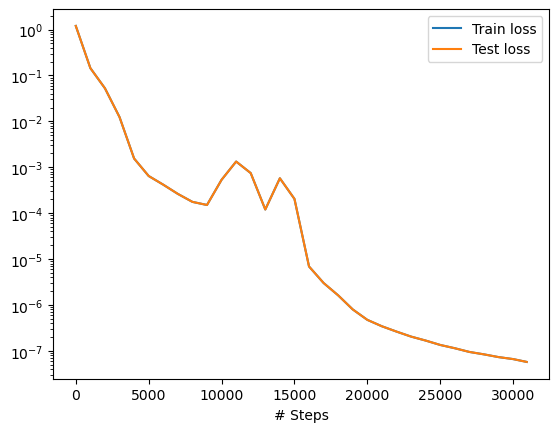

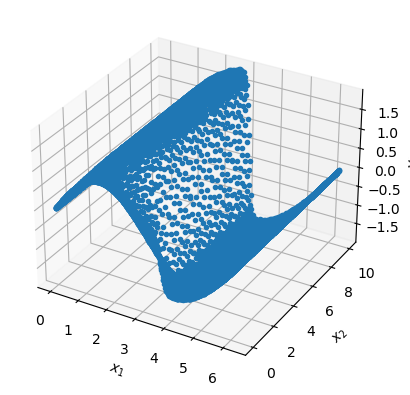

In [4]:
dde.saveplot(losshistory, train_state, issave=False, isplot=True)

Text(0.5, 1.0, '$\\nu$=0.1')

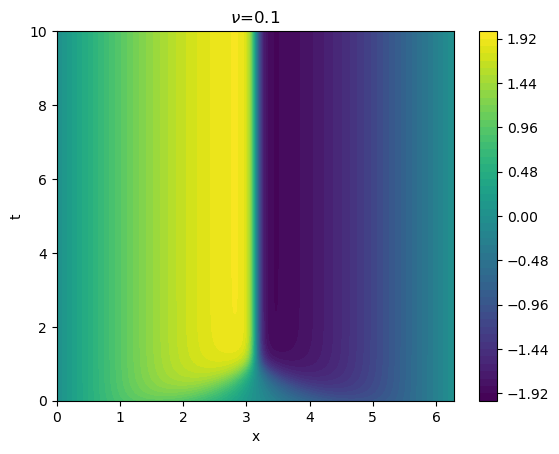

In [5]:
t=np.linspace(0.0,10.0,1000)
x=np.linspace(0.0,2*np.pi,1000)
xx, tt = np.meshgrid(x, t)
X=np.concatenate([xx.reshape(1000,1000,1),tt.reshape(1000,1000,1)],axis=2)
f1 = model5.predict(X.reshape((1000000,2)))
s=plt.contourf(xx,tt,f1.reshape(1000,1000),50)
plt.colorbar(s)
plt.xlabel("x")
plt.ylabel("t")
plt.title(r"$\nu$=0.1")

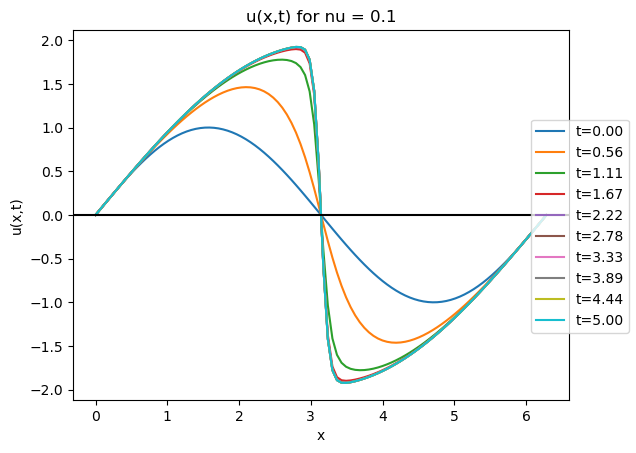

In [7]:
number_of_plots = 10
t1 = np.linspace(0,5,number_of_plots)

fig=plt.figure(1)#,figsize=(10,8)
x = np.linspace(0,2*np.pi,100)
#fig,axes = plt.subplots(number_of_plots,figsize=(6,number_of_plots*6))
for i in range(number_of_plots):
    
    t = t1[i] * np.ones_like(x)
    X_T = np.concatenate([x.reshape(100,1),t.reshape(100,1)],axis=1)
    z = model5.predict(X_T)
    plt.plot(x,z,label="t=%.2f"%(t1[i]))
    
plt.axhline(y=0,xmin=0.0,xmax=2*np.pi,c="black")
plt.xlabel('x')
plt.ylabel('u(x,t)')
plt.title("u(x,t) for nu = 0.1")
fig.legend(loc='outside right')

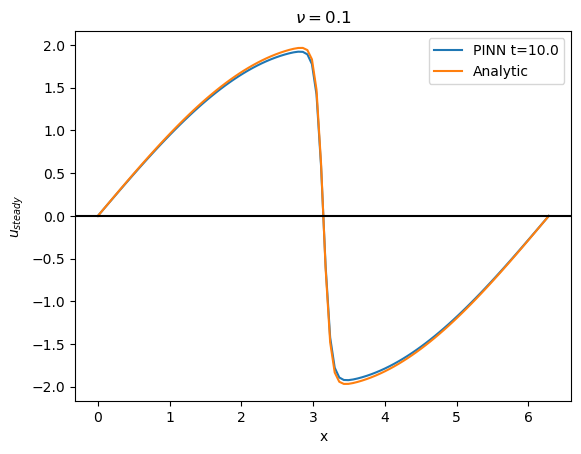

In [14]:
def sgn(x):
    out = []
    for i in x:
        if i<0:
            out.append(1.0)
        else:
            out.append(-1.0)
    return np.array(out)


def u(x,nu):
    return 2*sgn(x-np.pi)*(np.sin(x/2)-1) +2*np.tanh((np.pi-x)/nu)

x = np.linspace(0,2*np.pi,100)
t = 10.0 * np.ones_like(x)
X_T = np.concatenate([x.reshape(100,1),t.reshape(100,1)],axis=1)
z = model5.predict(X_T)
plt.plot(x,z,label="PINN t=10.0")
u_0_9 = u(x,0.1)
plt.plot(x,u_0_9,label='Analytic')
plt.axhline(y=0,xmin=0.0,xmax=2*np.pi,c="black")

plt.xlabel('x')
plt.ylabel('$u_{steady}$')
plt.title(r'$\nu =0.1$')
plt.legend()

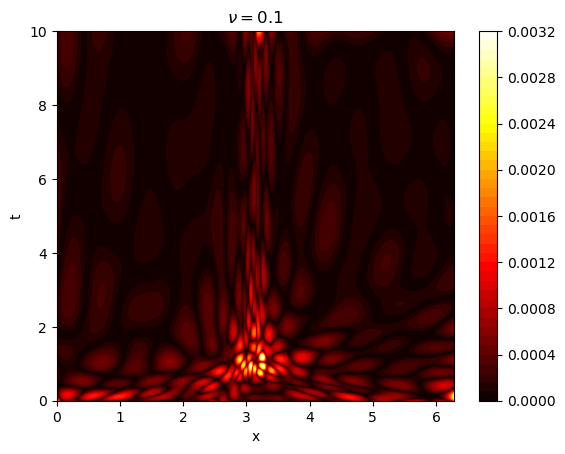

In [15]:
plt.figure(2)#,figsize=(12,10))
t=np.linspace(0,10,1000)
x=np.linspace(0,2*np.pi,1000)
xx, tt = np.meshgrid(x, t)

X=np.concatenate([xx.reshape(1000,1000,1),tt.reshape(1000,1000,1)],axis=2)
f1 = np.abs(model5.predict(X.reshape((1000000,2)),operator=pde))

s=plt.contourf(xx,tt,f1.reshape(1000,1000),50)
cmap = plt.get_cmap('hot')
plt.set_cmap(cmap)
plt.colorbar()
#plt.savefig('R10911.png')
plt.xlabel('x')
plt.ylabel('t')
plt.title(r'$\nu=0.1$')
plt.show()